# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [3]:
print('Quantidade de nomes: ' + str(len(nomes_m) + len(nomes_f)))

Quantidade de nomes: 400


In [4]:
frames = [nomes_f, nomes_m]

In [5]:
nomes = pd.concat(frames)['nome'].to_frame()

In [6]:
nomes.sample(3)

,nome
119,MOISES
86,MAURO
4,CARLOS


# Incluindo ID dos alunos

In [7]:
import numpy as np
np.random.seed(123)

In [8]:
total_alunos = len(nomes)
total_alunos

400

In [9]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [10]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [11]:
dominios = ['@dominioemail.com.br', '@servicoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominioemail.com.br
0,JOSE,331,@servicoemail.com
179,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [12]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [13]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominioemail.com.br,arthur@dominioemail.com.br
57,DAIANE,303,@servicoemail.com,daiane@servicoemail.com
85,HELENA,221,@dominioemail.com.br,helena@dominioemail.com.br
183,IRACI,8,@dominioemail.com.br,iraci@dominioemail.com.br
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br


# Criando a tabela Cursos

In [14]:
import html5lib

In [15]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [16]:
type(cursos)

list

#### cursos[0] é usado para transformar a lista cursos em um Data Frame

In [17]:
cursos = cursos[0]
type(cursos)

pandas.core.frame.DataFrame

In [18]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index dos Cursos

In [19]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

In [20]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [21]:
cursos['id'] = cursos.index + 1

In [22]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [23]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os Alunos nos Cursos

In [24]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominioemail.com.br,isabel@dominioemail.com.br
172,REBECA,165,@servicoemail.com,rebeca@servicoemail.com
130,JUNIOR,184,@dominioemail.com.br,junior@dominioemail.com.br
70,JOAQUIM,248,@servicoemail.com,joaquim@servicoemail.com
171,VALDEMIR,3,@dominioemail.com.br,valdemir@dominioemail.com.br


In [25]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [26]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicoemail.com,ruan@servicoemail.com,1
44,RAIMUNDA,259,@servicoemail.com,raimunda@servicoemail.com,1
50,RAFAELA,27,@dominioemail.com.br,rafaela@dominioemail.com.br,1
45,ADRIANO,196,@servicoemail.com,adriano@servicoemail.com,2
117,PAMELA,189,@dominioemail.com.br,pamela@dominioemail.com.br,1


In [27]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [28]:
import seaborn as sns

C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

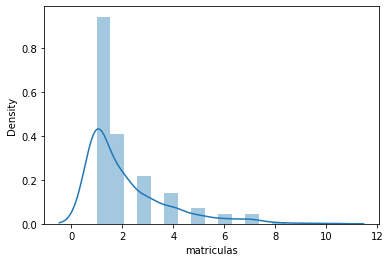

In [29]:
sns.distplot(nomes.matriculas)

In [30]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
6       9
7       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

In [31]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicoemail.com,barbara@servicoemail.com,1
170,ALEXANDRO,341,@servicoemail.com,alexandro@servicoemail.com,1
197,MICHAEL,323,@dominioemail.com.br,michael@dominioemail.com.br,2
196,ARLINDO,99,@servicoemail.com,arlindo@servicoemail.com,1
138,NEUSA,75,@dominioemail.com.br,neusa@dominioemail.com.br,2


# Selecionando cursos

In [32]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominioemail.com.br,cristiane@dominioemail.com.br,1
154,NICOLE,182,@dominioemail.com.br,nicole@dominioemail.com.br,2
191,TERESA,264,@dominioemail.com.br,teresa@dominioemail.com.br,1


In [33]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [34]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_do_aluno', 'id_do_curso'])

In [35]:
matriculas.head()

,id_do_aluno,id_do_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [44]:
matriculas_por_curso = matriculas.groupby('id_do_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_do_aluno':'qtd_de_alunos' })
matriculas_por_curso

,qtd_de_alunos,nome_do_curso
id_do_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [38]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
167,TAINARA,128,@servicoemail.com,tainara@servicoemail.com,2
141,NEIDE,325,@dominioemail.com.br,neide@dominioemail.com.br,1
88,GILMAR,142,@servicoemail.com,gilmar@servicoemail.com,1


In [39]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [40]:
matriculas.head(3)

,id_do_aluno,id_do_curso
0,235,19
1,235,19
2,43,9


In [43]:
matriculas_por_curso.head(10)

,qtd_de_alunos,nome_do_curso
id_do_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java
